### Libraries

In [819]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.model_selection import GridSearchCV

### Importing Data

In [820]:
x = pd.read_csv('../data/x.csv')
y = pd.read_csv('../data/y.csv')

In [821]:
x.columns

Index(['TEAM_ID', 'SEASON', 'PTS_home', 'FG_PCT_home', 'FT_PCT_home',
       'FG3_PCT_home', 'AST_home', 'REB_home', 'PTS_away', 'FG_PCT_away',
       'FT_PCT_away', 'FG3_PCT_away', 'AST_away', 'REB_away'],
      dtype='object')

In [822]:
y.min(), y.max()

(win%    0.117647
 dtype: float64,
 win%    0.839623
 dtype: float64)

In [823]:
x

,TEAM_ID,SEASON,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away
0,1610612737,2003,4023.0,18.417,32.679,14.154,850.0,1864.0,3668.0,17.501,31.373,12.516,816.0,1684.0
1,1610612738,2003,4185.0,19.492,33.619,15.096,907.0,1841.0,4053.0,19.015,32.211,14.146,867.0,1650.0
2,1610612739,2003,3917.0,17.853,31.496,13.037,963.0,1893.0,3885.0,18.717,31.156,13.925,891.0,1941.0
3,1610612740,2003,4207.0,19.507,33.375,15.414,1038.0,1907.0,3991.0,18.272,34.342,13.256,840.0,1937.0
4,1610612741,2003,3645.0,16.630,29.449,14.197,933.0,1872.0,3768.0,17.942,30.515,14.893,870.0,1726.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1610612762,2021,5353.0,22.121,35.296,16.640,1073.0,2154.0,4994.0,20.952,35.564,15.887,960.0,2098.0
565,1610612763,2021,5820.0,23.344,37.485,17.915,1328.0,2447.0,5651.0,22.470,36.891,17.321,1247.0,2444.0
566,1610612764,2021,4795.0,20.453,33.596,14.558,1099.0,1880.0,4551.0,20.013,33.339,14.829,1041.0,1842.0
567,1610612765,2021,4535.0,18.776,34.259,13.830,1010.0,1876.0,4480.0,18.420,33.006,14.232,1004.0,1822.0


In [824]:
# To use first 12 cols
x = x.iloc[:, 2:]

In [825]:
# models
dummy_reg = DummyRegressor(strategy="mean")
tree_reg = DecisionTreeRegressor()
rf_reg = RandomForestRegressor()
knn_reg = KNeighborsRegressor()
svm_reg = SVR()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklea

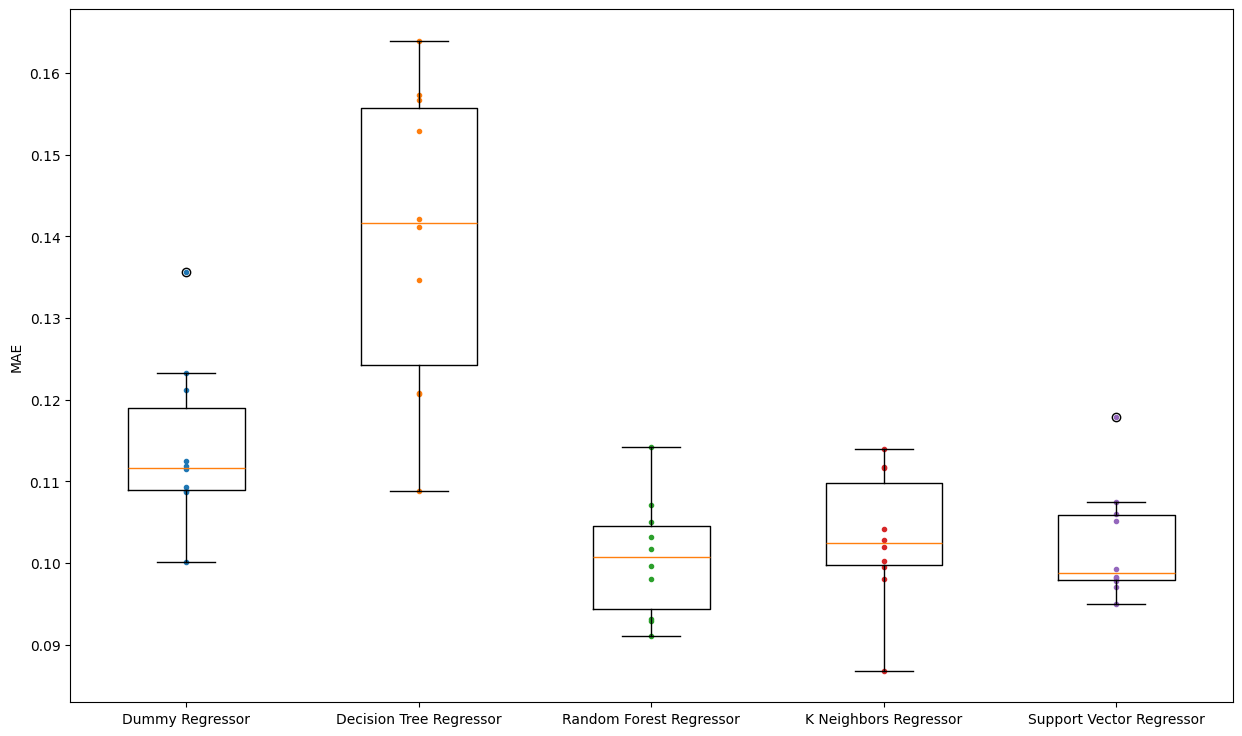

In [854]:
# Cross-validation without scaling
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Perform cross-validation with scaled data
dummy_reg_cv = -cross_val_score(dummy_reg, x, y, cv=10, scoring='neg_mean_absolute_error')
tree_reg_cv = -cross_val_score(tree_reg, x, y, cv=10, scoring='neg_mean_absolute_error')
rf_cv = -cross_val_score(rf_reg, x, y, cv=10, scoring='neg_mean_absolute_error')
knn_cv = -cross_val_score(knn_reg, x, y, cv=10, scoring='neg_mean_absolute_error')
svm_cv = -cross_val_score(svm_reg, x, y, cv=10, scoring='neg_mean_absolute_error')

# Plotting the results
plt.figure(figsize=(15, 9))
plt.plot([1]*10, dummy_reg_cv, '.')
plt.plot([2]*10, tree_reg_cv, '.')
plt.plot([3]*10, rf_cv, '.')
plt.plot([4]*10, knn_cv, '.')
plt.plot([5]*10, svm_cv, '.')
plt.boxplot(
    [dummy_reg_cv, tree_reg_cv, rf_cv, knn_cv, svm_cv],
    labels=['Dummy Regressor', 'Decision Tree Regressor', 'Random Forest Regressor', 
            'K Neighbors Regressor', 'Support Vector Regressor']
)
plt.ylabel('MAE')
plt.show()


In [828]:
# mean results
dummy_reg_cv.mean(), tree_reg_cv.mean(), rf_cv.mean(), knn_cv.mean(), svm_cv.mean()

(np.float64(0.11427926406604334),
 np.float64(0.14555528085943314),
 np.float64(0.10225305542948811),
 np.float64(0.11083164354498831),
 np.float64(0.1022009254765821))

In [829]:
# Perform cross-validation with scaled data
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

scaler = StandardScaler()

def cross_validation(x, y, model):
    cv = KFold(n_splits=10, shuffle=True, random_state=17)  # Initialize K-Fold
    mae = []  # To store MAE for each fold
    scaler = StandardScaler()  # Initialize the scaler
    
    for train_index, test_index in cv.split(x):
        # Split the data into training and testing sets
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        # Scale the features
        scaler.fit(x_train)
        x_train_scaled = scaler.transform(x_train)
        x_test_scaled = scaler.transform(x_test)
        
        # Fit the model on the scaled training data
        model.fit(x_train_scaled, y_train)
        
        # Predict on the scaled test data
        y_pred = model.predict(x_test_scaled)
        
        # Compute MAE and append it to the list
        mae.append(mean_absolute_error(y_test, y_pred))
    
    return mae
    

In [830]:
mae_dummy = cross_validation(x.values, y.values, dummy_reg)
mae_tree = cross_validation(x.values, y.values, tree_reg)
mae_rf = cross_validation(x.values, y.values, rf_reg)
mae_knn = cross_validation(x.values, y.values, knn_reg)
mae_svm = cross_validation(x.values, y.values, svm_reg)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklea

/var/folders/36/dqn14xy95j93q4nqhpjrg0s80000gn/T/ipykernel_97310/3112632282.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


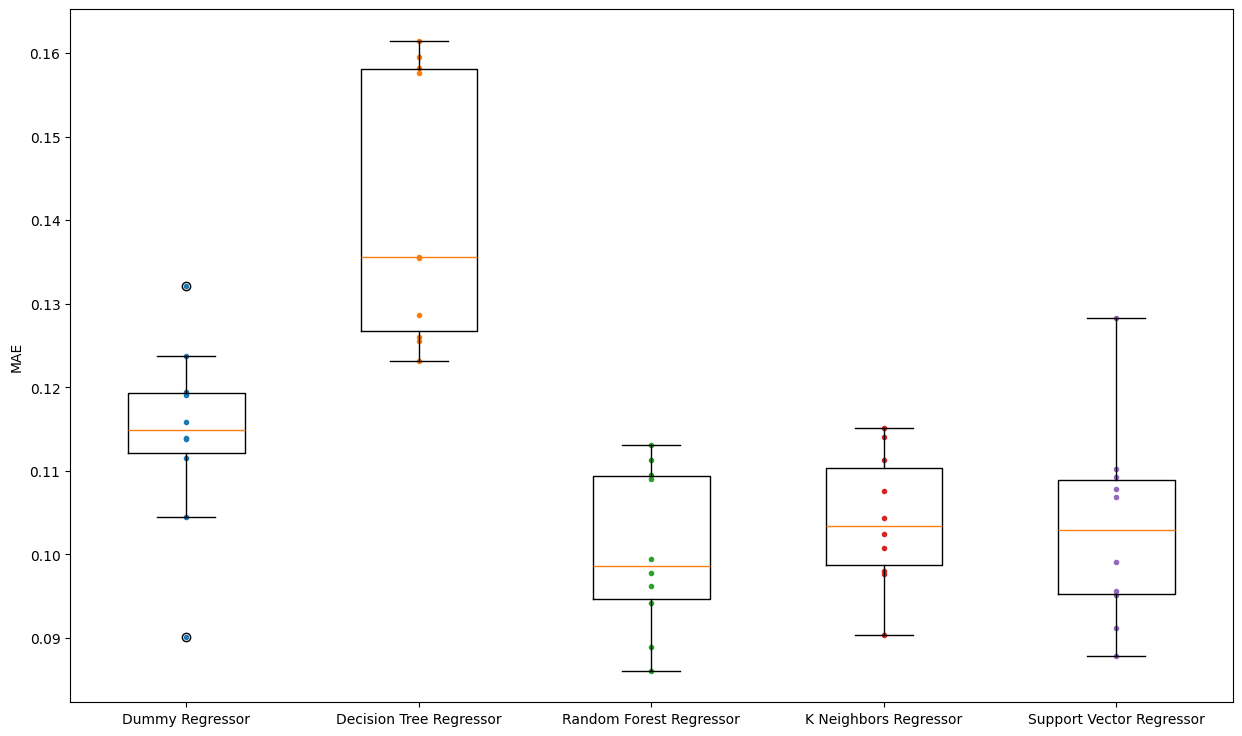

In [831]:
# plotting
plt.figure(figsize=(15, 9))
plt.plot([1]*10, mae_dummy, '.')
plt.plot([2]*10, mae_tree, '.')
plt.plot([3]*10, mae_rf, '.')
plt.plot([4]*10, mae_knn, '.')
plt.plot([5]*10, mae_svm, '.')
plt.boxplot(
    [mae_dummy, mae_tree, mae_rf, mae_knn, mae_svm],
    labels=['Dummy Regressor', 'Decision Tree Regressor', 'Random Forest Regressor', 
            'K Neighbors Regressor', 'Support Vector Regressor']
)
plt.ylabel('MAE')
plt.show()

Hyperparameter Tuning

In [832]:
# Random Forest Regressor
rf_reg = RandomForestRegressor(random_state=17)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 300, 500],
    'max_depth': [5, 10, 15, 20, 25],
    'min_samples_split': [2, 5, 10],
}

# Perform GridSearchCV with 10-fold cross-validation
rf_grid = GridSearchCV(rf_reg, param_grid, cv=10, n_jobs=-1, verbose=1, scoring='neg_mean_absolute_error')

# Fit model on training data
rf_grid.fit(x, y)

Fitting 10 folds for each of 75 candidates, totalling 750 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklea

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=17), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20, 25],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200, 300, 500]},
             scoring='neg_mean_absolute_error', verbose=1)

In [833]:
# Print the best parameters found
print(f'Best parameters: {rf_grid.best_params_}')

Best parameters: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 300}


In [834]:
print(f'Mean cross-validated score of the best_estimator: {rf_grid.best_score_}')

Mean cross-validated score of the best_estimator: -0.10059071674475106


In [835]:
results_rf = pd.DataFrame(rf_grid.cv_results_)
scores_rf = results['mean_test_score']

In [836]:
# K Neighbors Regressor
knn_reg = KNeighborsRegressor()
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}
knn_grid = GridSearchCV(knn_reg, param_grid, cv=10, n_jobs=-1, verbose=1, scoring='neg_mean_absolute_error')
knn_grid.fit(x, y)
print(f'Best parameters: {knn_grid.best_params_}')

Fitting 10 folds for each of 56 candidates, totalling 560 fits
Best parameters: {'algorithm': 'auto', 'n_neighbors': 15, 'weights': 'uniform'}


In [837]:
print(f'Mean cross-validated score of the best_estimator: {knn_grid.best_score_}')

Mean cross-validated score of the best_estimator: -0.10309277428078042


In [838]:
print(f'Mean cross-validated score of the best_estimator: {knn_grid.best_score_}')

Mean cross-validated score of the best_estimator: -0.10309277428078042


In [839]:
results_knn = pd.DataFrame(knn_grid.cv_results_)
scores_knn = results_knn['mean_test_score']

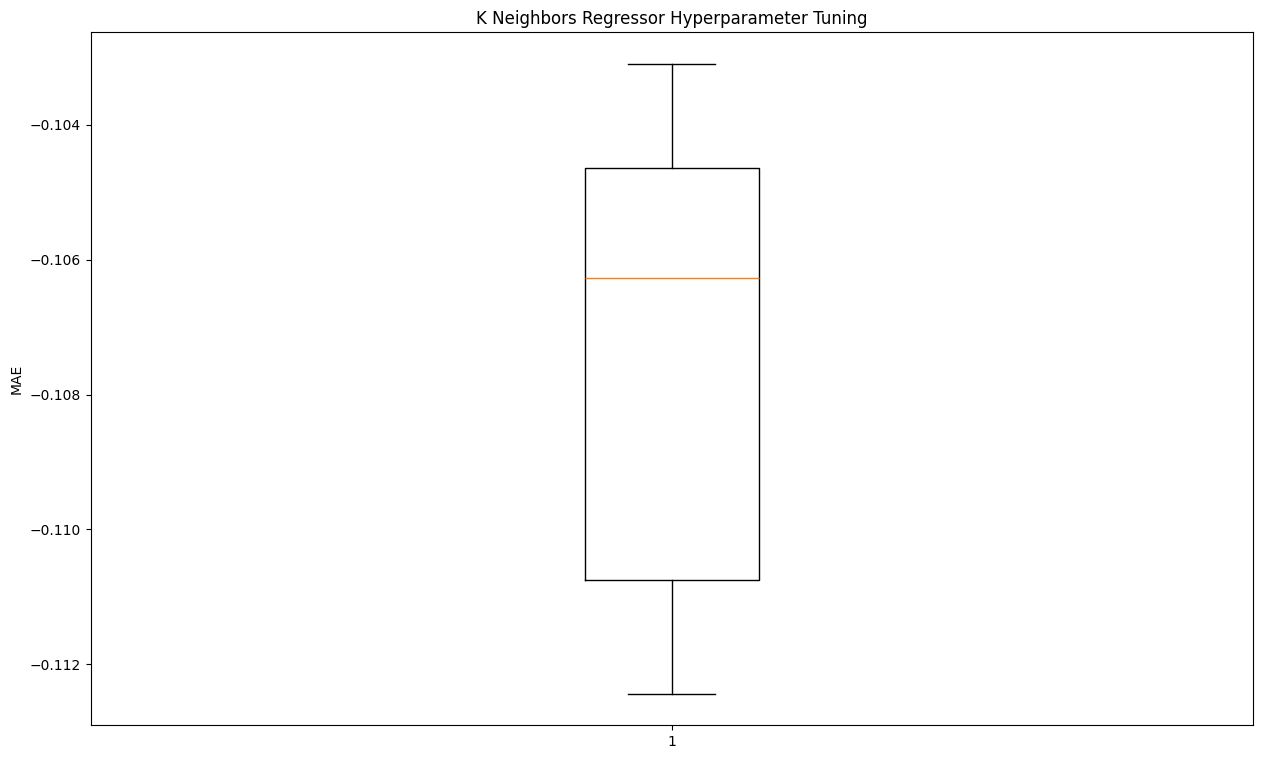

In [840]:
# boxplot
plt.figure(figsize=(15, 9))
plt.boxplot(scores_knn)
plt.ylabel('MAE')
plt.title('K Neighbors Regressor Hyperparameter Tuning')
plt.show()

In [841]:
# Support Vector Regressor
svm_reg = SVR()
param_grid = {
    'degree': [2, 3, 4, 5],
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.1, 0.2, 0.5, 0.3]
}
svm_grid = GridSearchCV(svm_reg, param_grid, cv=10, n_jobs=-1, verbose=1, scoring='neg_mean_absolute_error')
svm_grid.fit(x, y)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/uti

GridSearchCV(cv=10, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'degree': [2, 3, 4, 5],
                         'epsilon': [0.1, 0.2, 0.5, 0.3]},
             scoring='neg_mean_absolute_error', verbose=1)

In [842]:
print(f'Best parameters: {svm_grid.best_params_}')

Best parameters: {'C': 1, 'degree': 2, 'epsilon': 0.1}


In [843]:
print(f'Mean cross-validated score of the best_estimator: {svm_grid.best_score_}')

Mean cross-validated score of the best_estimator: -0.1022009254765821


In [844]:
results_svm = pd.DataFrame(svm_grid.cv_results_)
scores_svm = results_svm['mean_test_score']

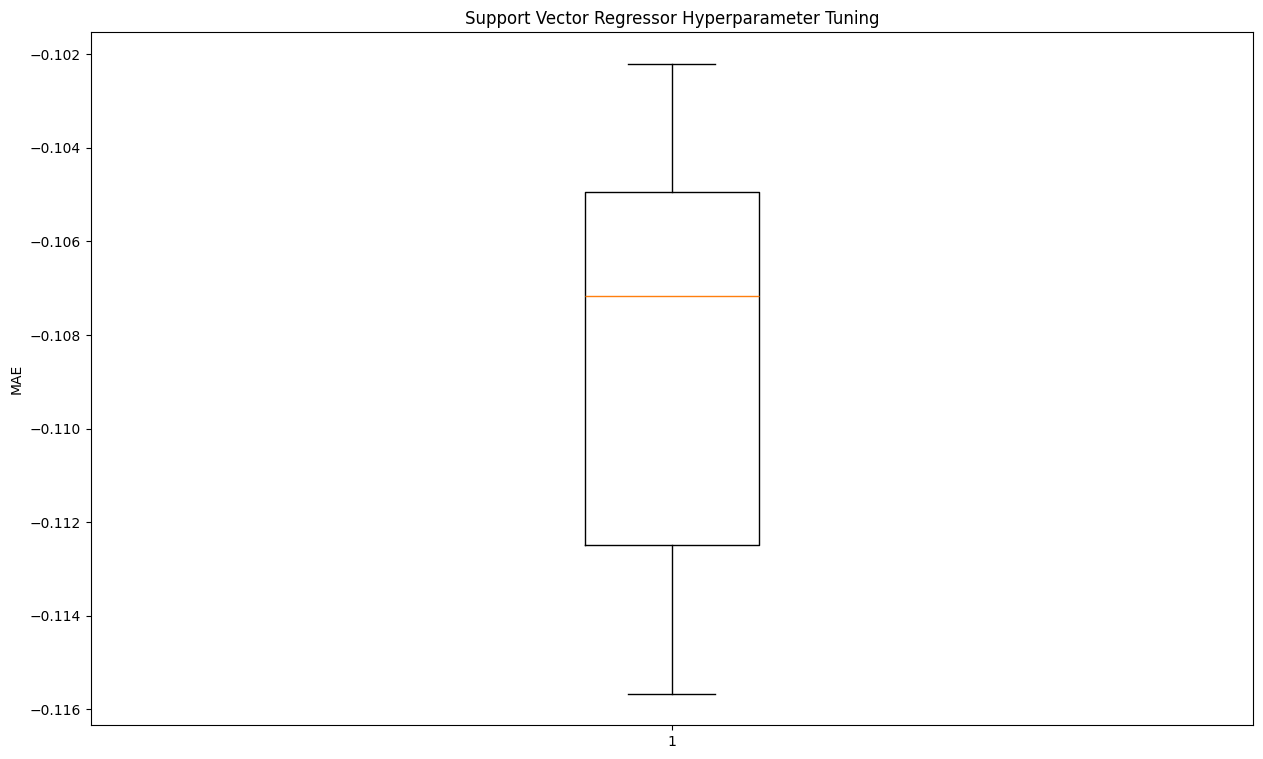

In [845]:
# boxplot
plt.figure(figsize=(15, 9))
plt.boxplot(scores_svm)
plt.ylabel('MAE')
plt.title('Support Vector Regressor Hyperparameter Tuning')
plt.show()

In [846]:
# rf best params
print(f'Best parameters: {rf_grid.best_params_}')

Best parameters: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 300}


In [847]:
# knn best params
print(f'Best parameters: {knn_grid.best_params_}')

Best parameters: {'algorithm': 'auto', 'n_neighbors': 15, 'weights': 'uniform'}


In [848]:
# svm best params
print(f'Best parameters: {svm_grid.best_params_}')

Best parameters: {'C': 1, 'degree': 2, 'epsilon': 0.1}


In [849]:
## using best parameters 

dummy_reg = DummyRegressor(strategy="mean")
tree_reg = DecisionTreeRegressor()
rf_reg = RandomForestRegressor(n_estimators=300, max_depth=5, min_samples_split=2, random_state=17)
knn_reg = KNeighborsRegressor(n_neighbors=15, weights='uniform', algorithm='auto')
svm_reg = SVR(C=1, degree=2, epsilon=0.1)

mae_dummy = cross_validation(x.values, y.values, dummy_reg)
mae_tree = cross_validation(x.values, y.values, tree_reg)
mae_optim_rf = cross_validation(x.values, y.values, rf_reg)
mae_optim_knn = cross_validation(x.values, y.values, knn_reg)
mae_optim_svm = cross_validation(x.values, y.values, svm_reg)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklea

/var/folders/36/dqn14xy95j93q4nqhpjrg0s80000gn/T/ipykernel_97310/342761181.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


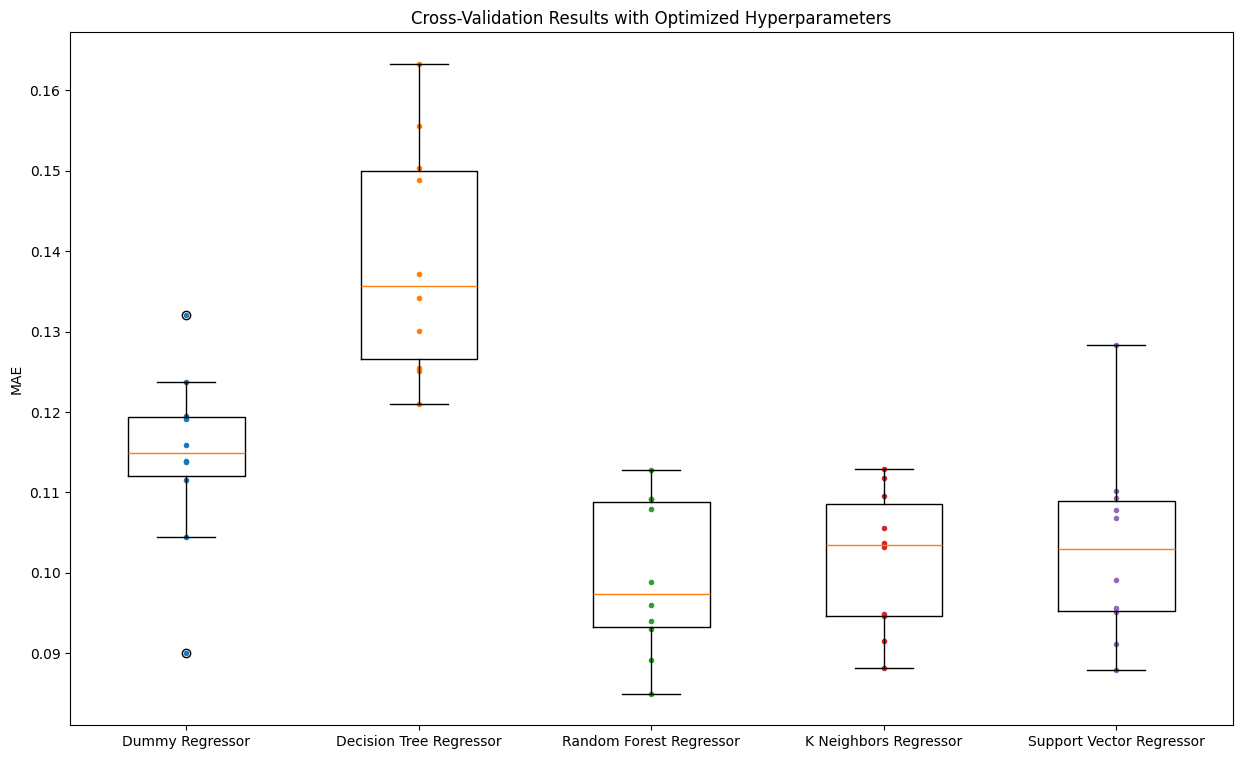

In [850]:
# plotting
plt.figure(figsize=(15, 9))
plt.plot([1]*10, mae_dummy, '.')
plt.plot([2]*10, mae_tree, '.')
plt.plot([3]*10, mae_optim_rf, '.')
plt.plot([4]*10, mae_optim_knn, '.')
plt.plot([5]*10, mae_optim_svm, '.')
plt.boxplot(
    [mae_dummy, mae_tree, mae_optim_rf, mae_optim_knn, mae_optim_svm],
    labels=['Dummy Regressor', 'Decision Tree Regressor', 'Random Forest Regressor', 
            'K Neighbors Regressor', 'Support Vector Regressor']
)
plt.ylabel('MAE')
plt.title('Cross-Validation Results with Optimized Hyperparameters')
plt.show()

In [851]:
# Without scaling
dummy_reg = DummyRegressor(strategy="mean")
tree_reg = DecisionTreeRegressor()
rf_reg = RandomForestRegressor(n_estimators=300, max_depth=5, min_samples_split=2, random_state=17)
knn_reg = KNeighborsRegressor(n_neighbors=15, weights='uniform', algorithm='auto')
svm_reg = SVR(C=1, degree=2, epsilon=0.1)

mae_dummy = -cross_val_score(dummy_reg, x, y, cv=10, scoring='neg_mean_absolute_error')
mae_tree = -cross_val_score(tree_reg, x, y, cv=10, scoring='neg_mean_absolute_error')
mae_optim_rf = -cross_val_score(rf_reg, x, y, cv=10, scoring='neg_mean_absolute_error')
mae_optim_knn = -cross_val_score(knn_reg, x, y, cv=10, scoring='neg_mean_absolute_error')
mae_optim_svm = -cross_val_score(svm_reg, x, y, cv=10, scoring='neg_mean_absolute_error')

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklea

/var/folders/36/dqn14xy95j93q4nqhpjrg0s80000gn/T/ipykernel_97310/2671759210.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


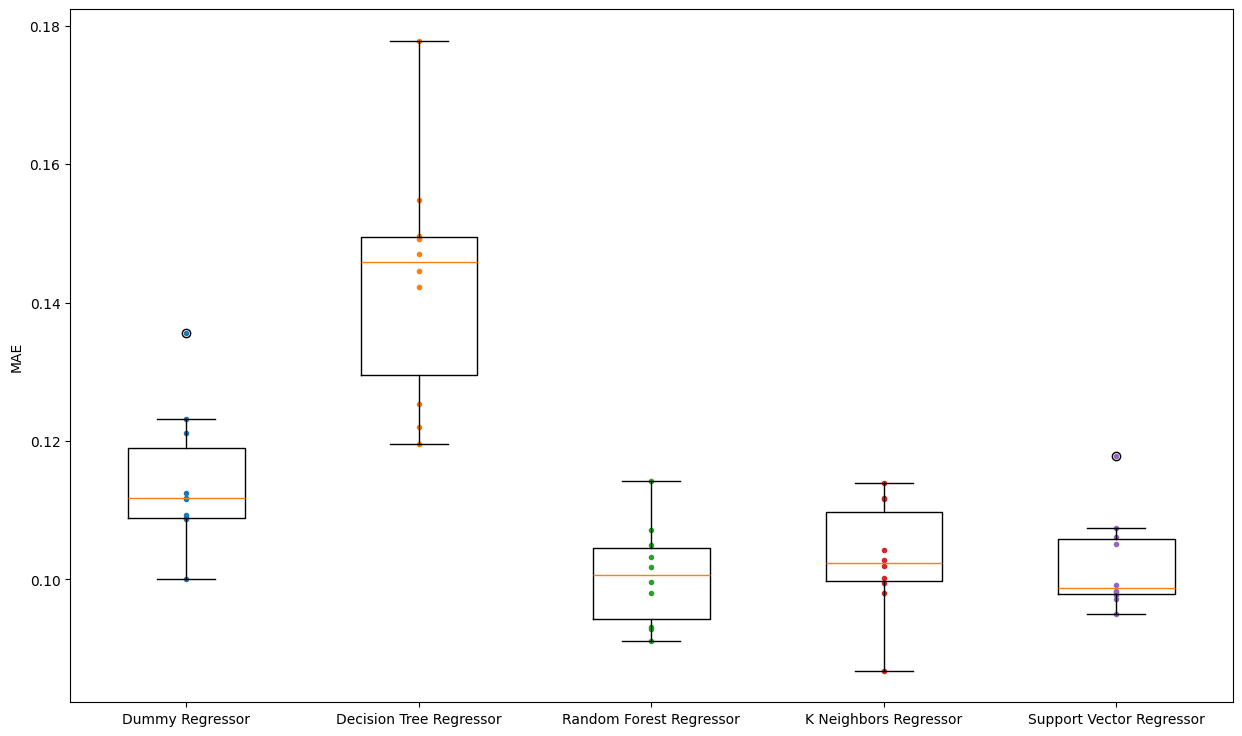

In [852]:
# plotting
plt.figure(figsize=(15, 9))
plt.plot([1]*10, mae_dummy, '.')
plt.plot([2]*10, mae_tree, '.')
plt.plot([3]*10, mae_optim_rf, '.')
plt.plot([4]*10, mae_optim_knn, '.')
plt.plot([5]*10, mae_optim_svm, '.')
plt.boxplot(
    [mae_dummy, mae_tree, mae_optim_rf, mae_optim_knn, mae_optim_svm],
    labels=['Dummy Regressor', 'Decision Tree Regressor', 'Random Forest Regressor', 
            'K Neighbors Regressor', 'Support Vector Regressor']
)
plt.ylabel('MAE')
plt.show()

In [853]:
# mean value of results for each model
print(f'Dummy Regressor: {mae_dummy.mean()}')
print(f'Decision Tree Regressor: {mae_tree.mean()}')
print(f'Random Forest Regressor: {mae_optim_rf.mean()}')
print(f'K Neighbors Regressor: {mae_optim_knn.mean()}')
print(f'Support Vector Regressor: {mae_optim_svm.mean()}')

Dummy Regressor: 0.11427926406604334
Decision Tree Regressor: 0.14320095708960984
Random Forest Regressor: 0.10059071674475106
K Neighbors Regressor: 0.10309277428078042
Support Vector Regressor: 0.1022009254765821
